# Project 1: SAT & ACT Analysis



## Problem Statement

As a data analyst for the department of education of Hawaii, I am tasked with analyzing the national average performance on SAT & ACT tests
Find factors influencing scores
Understand Hawaii's standing when it comes to these tests
Suggest improvements through data analysis & external research


In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2017 Data Import and Cleaning

In [2]:
#Read In SAT & ACT  Data:
sat_df = pd.read_csv('sat_2017.csv')
act_df = pd.read_csv('act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Displaying the head of the sat data
sat_df.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [4]:
#Displaying the head of the act data
act_df.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The data contains information about two different tests, namely the SAT's and the ACT's. The SAT information is across various features like the state where the test was taken, Participation, Scores in writing and Math and finally the Total score.

In a similar manner the ACT information is across features like state, participation, scores in English, math, reading and Science and finally the composite score.

#### 4a. Does the data look complete? 

Yes the data does look complete without any missing values. 

In [5]:
sat_df.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [6]:
act_df.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

Answer:

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

In [7]:
sat_df.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
act_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [10]:
sat_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
#Function to convert values to numeric values
def conv_to_numeric(df):
     for i in df.columns[1:]:
            df[i] = df[i].apply(lambda a : float(a))

- Fix any individual values preventing other columns from being the appropriate type.

In [12]:
#Cleaning of the data
act_df['State'] = act_df['State'].apply(lambda a : str(a) )
sat_df['State'] = sat_df['State'].apply(lambda a : str(a) )
act_df['Participation'] = act_df['Participation'].apply(lambda a : a.replace('%','') )
sat_df['Participation'] = sat_df['Participation'].apply(lambda a : a.replace('%','') )
act_df['Composite'] = act_df['Composite'].apply(lambda a : a.replace('x','') )

In [13]:
#converting values to numeric values
conv_to_numeric(act_df)
conv_to_numeric(sat_df)

- Finish your data modifications by making sure the columns are now typed appropriately.

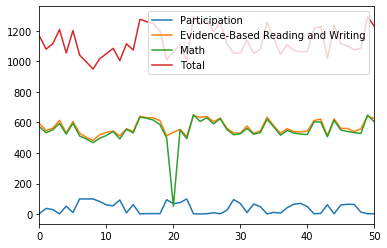

In [14]:
#Simple plots to find outliers
sat_df.plot()

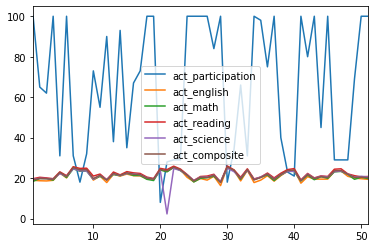

In [111]:
#Simple plots to find outliers
act_df.plot()

- Display the data types again to confirm they are correct.

In [16]:
#Displaying datatypes
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [17]:
#Displaying datatypes
sat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [18]:
#Renaming the columns for sat dataframe
sat_columns = ['state', 'sat_participation', 'sat_ebrw', 'sat_math', 'sat_total']
sat_df.columns = sat_columns
sat_df.head()

,state,sat_participation,sat_ebrw,sat_math,sat_total
0,Alabama,5.0,593.0,572.0,1165.0
1,Alaska,38.0,547.0,533.0,1080.0
2,Arizona,30.0,563.0,553.0,1116.0
3,Arkansas,3.0,614.0,594.0,1208.0
4,California,53.0,531.0,524.0,1055.0


In [19]:
#Renaming the columns for act dataframe
act_columns = ['state', 'act_participation', 'act_english', 'act_math', 'act_reading', 'act_science',
       'act_composite']
act_df.columns = act_columns
act_df.head()

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**sat_state**|*object*|sat_df|Name of the state where the SAT was reported from| 
|**sat_participation**|*float*|sat_df|Percentage participation in the exam from the sate|
|**sat_ebr**|*float*|sat_df|Evidence-Based Reading and Writing|
|**sat_math**|*float*|sat_df|Average Math score in the SAT|
|**sat_total**|*float*|sat_df|Average Total score in the SAT|
|**act_state**|*object*|act_df|Name of the state where the ACT was reported from| 
|**act_participation**|*float*|act_df|Percentage participation in the exam from the sate|
|**act_english**|*float*|act_df|Average English score in the ACT|
|**act_math**|*float*|act_df|Average Math score in the ACT|
|**act_reading**|*float*|act_df|Average reading score in the ACT|
|**act_science**|*float*|act_df|Average science score in the ACT|
|**act_composite**|*float*|act_df|Average composite score in the ACT|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [113]:
#Finding additional data
print (f'The datframe act_df contains {len(act_df)} rows')
print (f'The datframe sat_df contains {len(sat_df)} rows')

for i in act_df['state'].values:
    if i not in sat_df['state'].values:
        print (f'{i} is the state which is extra in the act dataframe')



The datframe act_df contains 51 rows
The datframe sat_df contains 51 rows


In [112]:
#dropping the row containing National as the state
act_df = act_df[act_df['state'] != 'National']
act_df.head()

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [22]:
#Joining the dataframe to a single one
final_df = pd.merge(act_df,sat_df, on ='state')

In [23]:
#Displaying the newly created dataframe
final_df.head()

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_ebrw,sat_math,sat_total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [24]:
#Exporting the dataframe to csv file
final_df.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [25]:
#Importing data for 2018
act_2018 = pd.read_csv('/Users/antonypaulson/Desktop/Git_mine/project_1/data/ACT_2018.csv')
sat_2018 = pd.read_csv('/Users/antonypaulson/Desktop/Git_mine/project_1/data/SAT_2018.csv')

In [26]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100,19.1
1,Arkansas,100,19.4
2,Kentucky,100,20.2
3,Louisiana,100,19.2
4,Mississippi,100,18.6


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [27]:
#Combining 2018 data
df_2018 = pd.merge(act_2018,sat_2018, on= 'State')
df_2018.columns = ['state', 'act_participation_2018', 'act_composite_2018', 'sat_participation_2018', 'sat_total_2018']

In [28]:
#Combining all data
final_df1 = pd.merge(final_df, df_2018, on = 'state')
final_df1.head()

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_ebrw,sat_math,sat_total,act_participation_2018,act_composite_2018,sat_participation_2018,sat_total_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593.0,572.0,1165.0,100,19.1,6,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0,33,20.8,43,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563.0,553.0,1116.0,66,19.2,29,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614.0,594.0,1208.0,100,19.4,5,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531.0,524.0,1055.0,27,22.7,60,1076


In [29]:
#Exporting to excel 
final_df1.to_csv('final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [30]:
#Quick overview using describe
final_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation,50.0,64.560,32.077814,8.0,31.000,68.00,100.000,100.0
act_english,50.0,20.980,2.351552,16.3,19.100,20.80,23.300,25.5
act_math,50.0,21.230,1.972386,18.0,19.500,21.05,23.100,25.3
act_reading,50.0,22.052,2.069925,18.1,20.500,21.85,24.175,26.0
act_science,50.0,21.070,3.208042,2.3,19.925,21.30,22.975,24.9
act_composite,50.0,21.562,2.018172,17.8,19.850,21.40,23.600,25.5
sat_participation,50.0,40.460,35.319076,2.0,4.000,40.50,66.500,100.0
sat_ebrw,50.0,569.900,45.783987,482.0,535.250,559.50,613.500,644.0
sat_math,50.0,548.240,85.657257,52.0,523.250,549.50,601.000,651.0
sat_total,50.0,1127.680,92.734301,950.0,1057.000,1107.50,1214.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [31]:
#Function to find the standard deviation
import numpy as np
def std_dev(a):
    ss = 0
    for i in a:
        sum_of_sq = (i - np.mean(a))**2
        ss += sum_of_sq
    std = ((1/len(a))*ss)**0.5
    return std

In [32]:
std_dev(final_df1['act_participation'])

31.755415286215364

In [33]:
np.std(final_df1['act_participation'])

31.755415286215364

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [34]:
#Finding std using the custom built function
sd_myfunc = {column : np.round(std_dev(final_df1[column]),2) for column in final_df1.columns[1:]} 
sd_myfunc

{'act_participation': 31.76,
 'act_english': 2.33,
 'act_math': 1.95,
 'act_reading': 2.05,
 'act_science': 3.18,
 'act_composite': 2.0,
 'sat_participation': 34.96,
 'sat_ebrw': 45.32,
 'sat_math': 84.8,
 'sat_total': 91.8,
 'act_participation_2018': 33.59,
 'act_composite_2018': 2.09,
 'sat_participation_2018': 37.61,
 'sat_total_2018': 93.44}

In [35]:
#Finding std using the np.std function
sd_numpy = {column : np.round(np.std(final_df1[column]),2) for column in final_df1.columns[1:]}
sd_numpy

{'act_participation': 31.76,
 'act_english': 2.33,
 'act_math': 1.95,
 'act_reading': 2.05,
 'act_science': 3.18,
 'act_composite': 2.0,
 'sat_participation': 34.96,
 'sat_ebrw': 45.32,
 'sat_math': 84.8,
 'sat_total': 91.8,
 'act_participation_2018': 33.59,
 'act_composite_2018': 2.09,
 'sat_participation_2018': 37.61,
 'sat_total_2018': 93.44}

In [36]:
final_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation,50.0,64.560,32.077814,8.0,31.000,68.00,100.000,100.0
act_english,50.0,20.980,2.351552,16.3,19.100,20.80,23.300,25.5
act_math,50.0,21.230,1.972386,18.0,19.500,21.05,23.100,25.3
act_reading,50.0,22.052,2.069925,18.1,20.500,21.85,24.175,26.0
act_science,50.0,21.070,3.208042,2.3,19.925,21.30,22.975,24.9
act_composite,50.0,21.562,2.018172,17.8,19.850,21.40,23.600,25.5
sat_participation,50.0,40.460,35.319076,2.0,4.000,40.50,66.500,100.0
sat_ebrw,50.0,569.900,45.783987,482.0,535.250,559.50,613.500,644.0
sat_math,50.0,548.240,85.657257,52.0,523.250,549.50,601.000,651.0
sat_total,50.0,1127.680,92.734301,950.0,1057.000,1107.50,1214.000,1295.0


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

The caluclated standard deviations via my function and the numpy method do match with each other. However the pandas describe provides slightly different answers.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [37]:
#Highest and Lowest SAT/ACT
sat_highest_part_2017 = final_df1.sort_values('sat_participation', ascending = False).head(4)['state'].values
sat_highest_part_2018 = final_df1.sort_values('sat_participation_2018', ascending = False).head(5)['state'].values
act_highest_part_2017 = final_df1.sort_values('act_participation', ascending = False).head(16)['state'].values
act_highest_part_2018 = final_df1.sort_values('act_participation_2018', ascending = False).head(16)['state'].values

sat_lowest_part_2017 = final_df1.sort_values('sat_participation').head(3)['state'].values
sat_lowest_part_2018 = final_df1.sort_values('sat_participation_2018').head(1)['state'].values
act_lowest_part_2017 = final_df1.sort_values('act_participation').head(1)['state'].values
act_lowest_part_2018 = final_df1.sort_values('act_participation_2018').head(1)['state'].values

In [38]:
#Custom functions for finding highs and lows of these data frames
def lowest(values_list, df, column):
    g = []
    for i, j in enumerate(values_list):
        if j == np.min(values_list):
            g.append(df[column][i])
    return g

def highest(values_list, df, column):
    d = []
    for i, j in enumerate(values_list):
        if j == np.max(values_list):
            d.append(df[column][i])
    return d

In [114]:
#Highest and Lowest SAT/ACT
sat_highest_part_2017 = highest(final_df1['sat_participation'], final_df1, 'state')
sat_highest_part_2018 = highest(final_df1['sat_participation_2018'], final_df1, 'state')
act_highest_part_2017 = highest(final_df1['act_participation'], final_df1, 'state')
act_highest_part_2018 = highest(final_df1['act_participation_2018'], final_df1, 'state')

sat_lowest_part_2017 = lowest(final_df1['sat_participation'], final_df1, 'state')
sat_lowest_part_2018 = lowest(final_df1['sat_participation_2018'], final_df1, 'state')
act_lowest_part_2017 = lowest(final_df1['act_participation'], final_df1, 'state')
act_lowest_part_2018 = lowest(final_df1['act_participation_2018'], final_df1, 'state')

In [115]:
#Highest and lowest mean total/Composite
highest_act_composite_2017 = highest(final_df1['act_composite'], final_df1, 'state')
highest_sat_total_2017 = highest(final_df1['sat_total'], final_df1, 'state')
highest_act_composite_2018 = highest(final_df1['act_composite_2018'], final_df1, 'state')
highest_sat_total_2018 = highest(final_df1['sat_total_2018'], final_df1, 'state')

lowest_act_composite_2017 = lowest(final_df1['act_composite'], final_df1, 'state')
lowest_sat_total_2017 = lowest(final_df1['sat_total'], final_df1, 'state')
lowest_act_composite_2018 = lowest(final_df1['act_composite_2018'], final_df1, 'state')
lowest_sat_total_2018 = lowest(final_df1['sat_total_2018'], final_df1, 'state')


In [270]:
print ('Highest ACT',highest_act_composite_2017)
print ('Highest SAT',highest_sat_total_2017)
print ('Highest ACT 2018',highest_act_composite_2018)
print ('Highest SAT 2018',highest_sat_total_2018)

Highest ACT ['New Hampshire']
Highest SAT ['Minnesota']
Highest ACT 2018 ['Connecticut']
Highest SAT 2018 ['Minnesota']


In [271]:
final_df1[final_df1.state == 'Minnesota']

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_ebrw,sat_math,sat_total,act_participation_2018,act_composite_2018,sat_participation_2018,sat_total_2018
23,Minnesota,100.0,20.4,21.5,21.8,21.6,21.5,3.0,644.0,651.0,1295.0,99,21.3,4,1298


In [117]:
# - Which states have the highest and lowest participation rates for the:
#     - 2017 SAT?
#     - 2018 SAT?
#     - 2017 ACT?
#     - 2018 ACT?

# Which states have the highest and lowest participation rates for the:
# 2017 SAT?
print(f'\nThe states which had the highest SAT particpation in 2017: \n {sat_highest_part_2017}')
print(f'\nThe states which had the lowest SAT in 2017 were: \n {sat_lowest_part_2017}')


The states which had the highest SAT particpation in 2017: 
 ['Connecticut', 'Delaware', 'District of Columbia', 'Michigan']

The states which had the lowest SAT in 2017 were: 
 ['Iowa', 'Mississippi', 'North Dakota']


In [118]:
# Which states have the highest and lowest participation rates for the:
# 2018 SAT?
print(f'\nThe states which had the highest SAT particpation in 2018: \n {sat_highest_part_2018}')
print(f'\nThe states which had the lowest SAT in 2018 were: \n {sat_lowest_part_2018}')


The states which had the highest SAT particpation in 2018: 
 ['Colorado', 'Connecticut', 'Delaware', 'Idaho', 'Michigan']

The states which had the lowest SAT in 2018 were: 
 ['North Dakota']


In [44]:
# Which states have the highest and lowest participation rates for the:
# 2017 ACT?
print(f'\nThe states which had the highest ACT particpation in 2017: \n {act_highest_part_2017}')
print(f'\nThe states which had the lowest ACT in 2017 were: \n {act_lowest_part_2017}')


The states which had the highest ACT particpation in 2017: 
 ['Alabama', 'Arkansas', 'Colorado', 'Kentucky', 'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada', 'North Carolina', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']

The states which had the lowest ACT in 2017 were: 
 ['Maine']


In [119]:
# Which states have the highest and lowest participation rates for the:
# 2018 ACT?
print(f'\nThe states which had the highest ACT particpation in 2018: \n {act_highest_part_2018}')
print(f'\nThe states which had the lowest ACT in 2018 were: \n {act_lowest_part_2018}')


The states which had the highest ACT particpation in 2018: 
 ['Alabama', 'Arkansas', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'North Carolina', 'Ohio', 'South Carolina', 'Tennessee', 'Utah', 'Wisconsin', 'Wyoming']

The states which had the lowest ACT in 2018 were: 
 ['Maine']


In [120]:
#States that have a rate change from 2017 to 2018:
def list_compare(list1, list2):
    dummy = []
    for i in list1:
        if i not in list2:
            dummy.append(i)
    return dummy


print(f'{list_compare(act_highest_part_2017, act_highest_part_2018)} underwent an ACT participation rate change from 2017 to 2018')
print(f'{list_compare(sat_highest_part_2017, sat_highest_part_2018)} underwent an SAT participation rate change from 2017 to 2018')

['Colorado', 'Minnesota'] underwent an ACT participation rate change from 2017 to 2018
['District of Columbia'] underwent an SAT participation rate change from 2017 to 2018


In [121]:
#States that had 50% or less participation in 2017
final_df1[(final_df1['sat_participation'] < 50) & (final_df1['act_participation'] < 50)]


,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_ebrw,sat_math,sat_total,act_participation_2018,act_composite_2018,sat_participation_2018,sat_total_2018
36,Oregon,40.0,21.2,21.5,22.4,21.7,21.8,43.0,560.0,548.0,1108.0,42,21.3,48,1117


In [122]:
#States that had 50% or less participation in 2018
final_df1[(final_df1['sat_participation_2018'] < 50) & (final_df1['act_participation_2018'] < 50)]

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_ebrw,sat_math,sat_total,act_participation_2018,act_composite_2018,sat_participation_2018,sat_total_2018
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547.0,533.0,1080.0,33,20.8,43,1106
36,Oregon,40.0,21.2,21.5,22.4,21.7,21.8,43.0,560.0,548.0,1108.0,42,21.3,48,1117


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

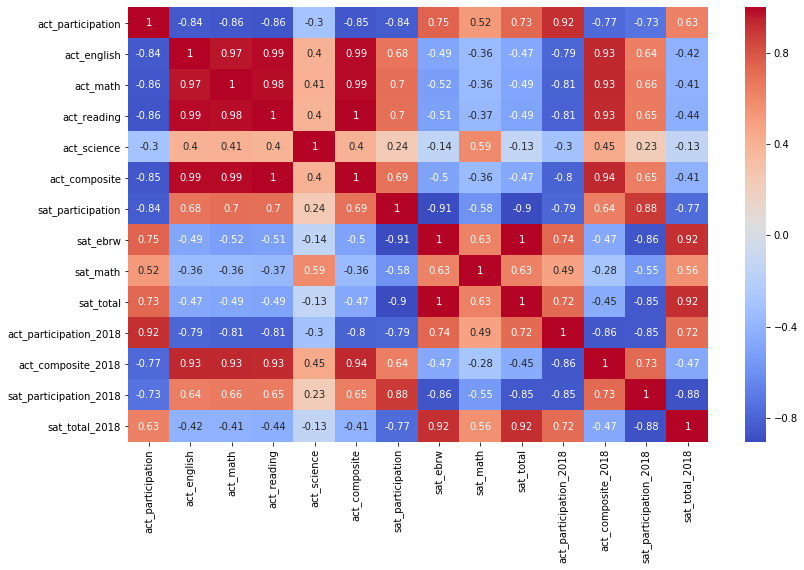

In [49]:
import seaborn as sns
plt.figure(figsize= (13,8))
sns.heatmap(final_df1.corr(), cmap ='coolwarm', annot= True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [50]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize= (12,12)) # You'll want to specify your figsize
    fig.tight_layout()
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

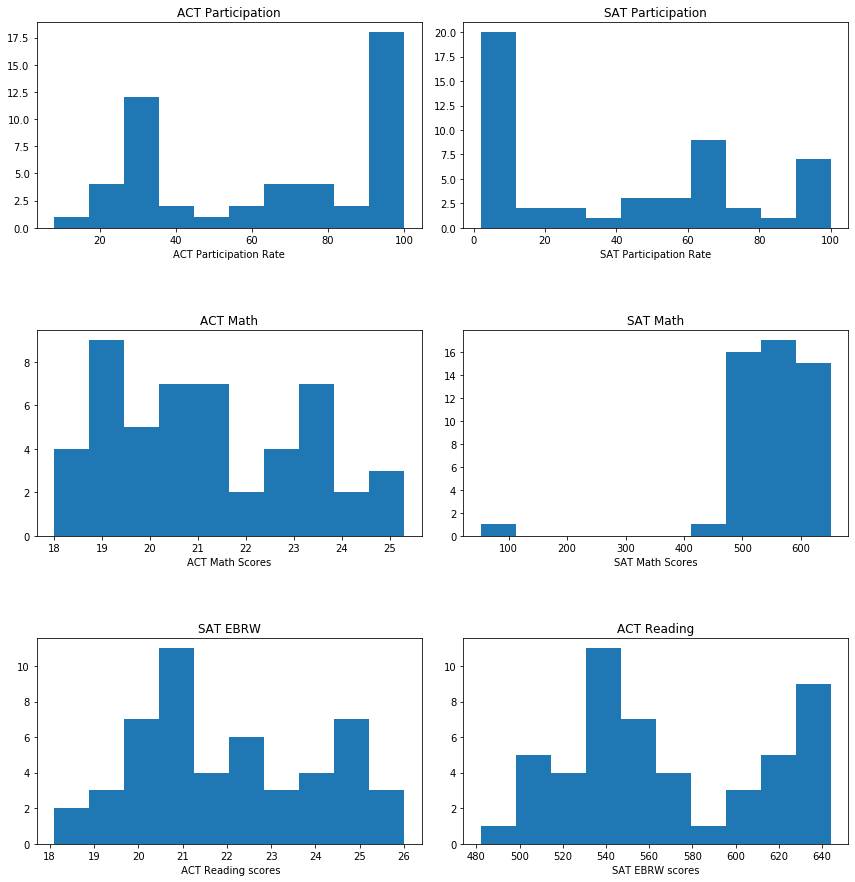

In [272]:
# Histograms
subplot_histograms(final_df1, 
                   ['act_participation','sat_participation', 'act_math', 'sat_math', 'act_reading', 'sat_ebrw', ], 
                   ['ACT Participation','SAT Participation', 'ACT Math', 'SAT Math', 'SAT EBRW', 'ACT Reading'], 
                   ['ACT Participation Rate','SAT Participation Rate', 'ACT Math Scores', 'SAT Math Scores',' ACT Reading scores', 'SAT EBRW scores' ])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [52]:
# #Before plotting these I would like to normalize our data
# final_df2 = final_df1

# final_df2.head()

In [53]:
# for i in final_df2.columns[1:]:
#     final_df2[i] = (final_df2[i] - np.mean(final_df2[i]))/np.std(final_df2[i])

In [54]:
#Creating the scatter plotting function
t = np.arange(50)
def subplot_scatter(dataframe, list_of_comparisons, list_of_titles, list_of_labels):
    nrows = int(np.ceil(len(list_of_comparisons)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize= (12,12)) # You'll want to specify your figsize
    fig.tight_layout()
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_comparisons): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[list_of_comparisons[i][0]],
                      dataframe[list_of_comparisons[i][1]],
                     c = t) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_labels[i][0])
        ax[i].set_ylabel(list_of_labels[i][1])
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)

In [55]:
final_df1.columns

Index(['state', 'act_participation', 'act_english', 'act_math', 'act_reading',
       'act_science', 'act_composite', 'sat_participation', 'sat_ebrw',
       'sat_math', 'sat_total', 'act_participation_2018', 'act_composite_2018',
       'sat_participation_2018', 'sat_total_2018'],
      dtype='object')

In [56]:
#Converting requirements into lists for inputs to the plotting function
list_of_comparisons =[('act_math','sat_math'),
                      ('act_reading','sat_ebrw'), 
                      ('act_composite','sat_total'),
                     ('sat_total','sat_total_2018'),
                     ('act_composite','act_composite_2018')]

list_of_titles = [('ACT Math VS SAT Math'), 
                  ('SAT EBRW VS ACT Reading'),
                 ('ACT Composite Vs SAT Total'),
                 ('Sat total 2017 Vs Sat total 2018'),
                 ('ACT composite 2017','ACT composite 2018')]

list_of_labels = [('ACT math score','SAT math score'),
                   ('ACT Reading score','SAT EBRW Score'), 
                   ('ACT Composite Score','SAT total'),
                   ('SAT Total 2017','SAT Total 2018'),
                   ('ACT Composite','ACT Composite 2018')]

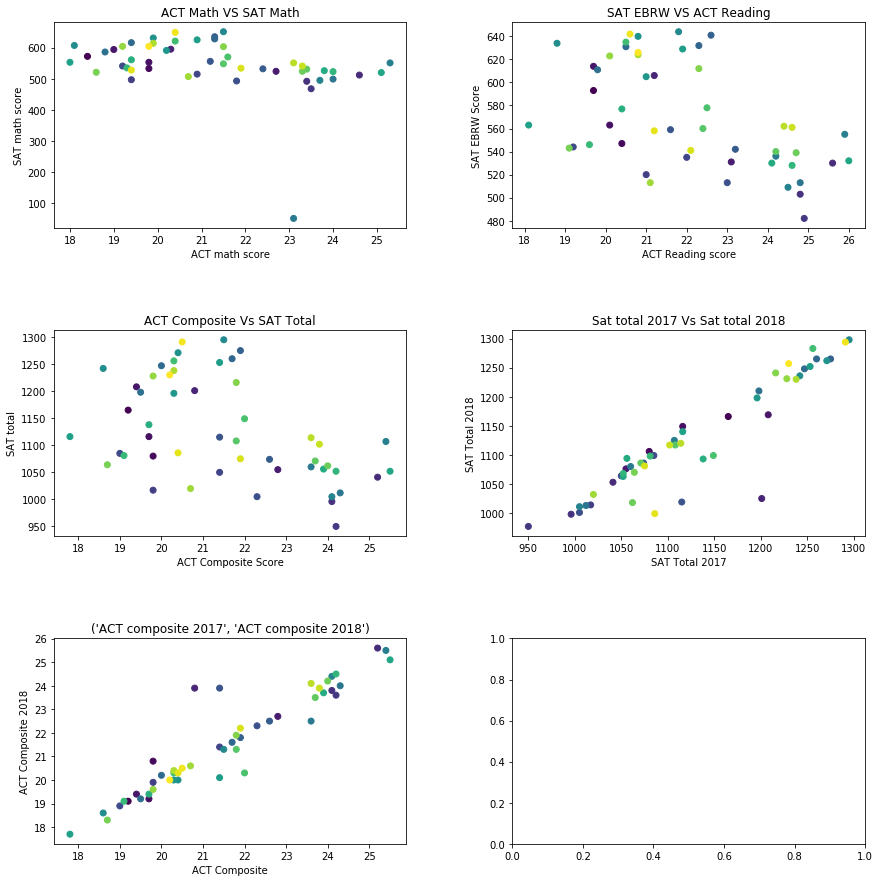

In [57]:
#Plotting the scatter plots
subplot_scatter(final_df1, list_of_comparisons, list_of_titles, list_of_labels)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

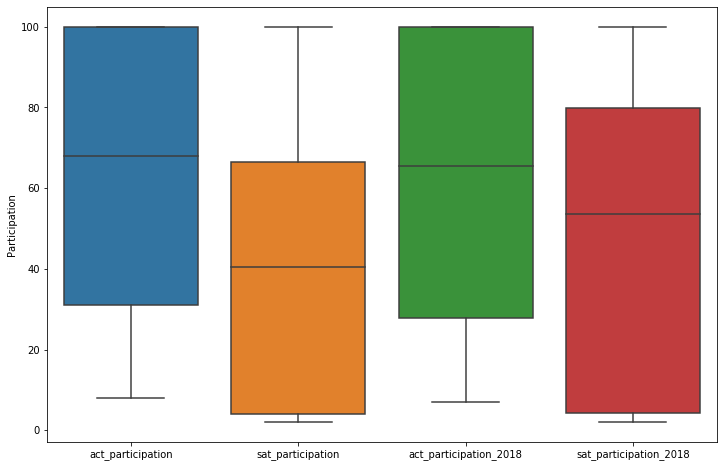

In [95]:
import seaborn as sns
#Participation rates

plt.figure(figsize= (12,8))
sns.boxplot(data= (final_df1['act_participation'], 
                   final_df1['sat_participation'], 
                   final_df1['act_participation_2018'], 
                   final_df1['sat_participation_2018']))
plt.ylabel('Participation')
plt.xticks((np.arange(4)), ('act_participation', 
                            'sat_participation', 
                            'act_participation_2018',
                           'sat_participation_2018'));

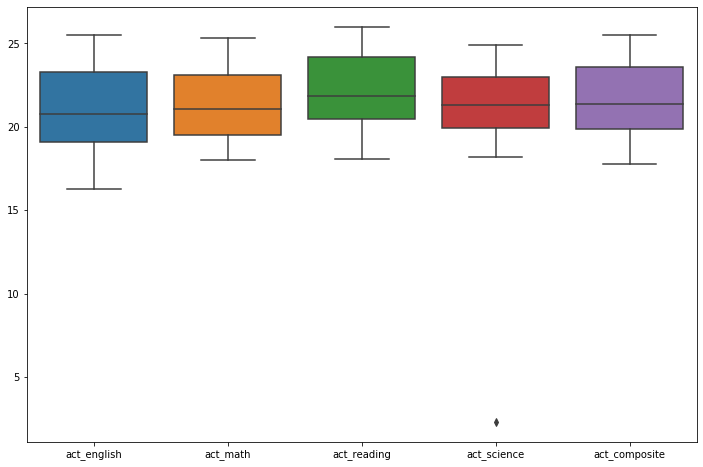

In [101]:
#ACT Scores
plt.figure(figsize= (12,8))

sns.boxplot(data= (final_df1['act_english'], 
                   final_df1['act_math'], 
                   final_df1['act_reading'], 
                   final_df1['act_science'],
                  final_df1['act_composite']))
plt.xticks((np.arange(5)),('act_english', 
                            'act_math', 
                            'act_reading',
                            'act_science',
                            'act_composite'));

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [103]:
final_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation,50.0,64.560,32.077814,8.0,31.000,68.00,100.000,100.0
act_english,50.0,20.980,2.351552,16.3,19.100,20.80,23.300,25.5
act_math,50.0,21.230,1.972386,18.0,19.500,21.05,23.100,25.3
act_reading,50.0,22.052,2.069925,18.1,20.500,21.85,24.175,26.0
act_science,50.0,21.070,3.208042,2.3,19.925,21.30,22.975,24.9
act_composite,50.0,21.562,2.018172,17.8,19.850,21.40,23.600,25.5
sat_participation,50.0,40.460,35.319076,2.0,4.000,40.50,66.500,100.0
sat_ebrw,50.0,569.900,45.783987,482.0,535.250,559.50,613.500,644.0
sat_math,50.0,548.240,85.657257,52.0,523.250,549.50,601.000,651.0
sat_total,50.0,1127.680,92.734301,950.0,1057.000,1107.50,1214.000,1295.0


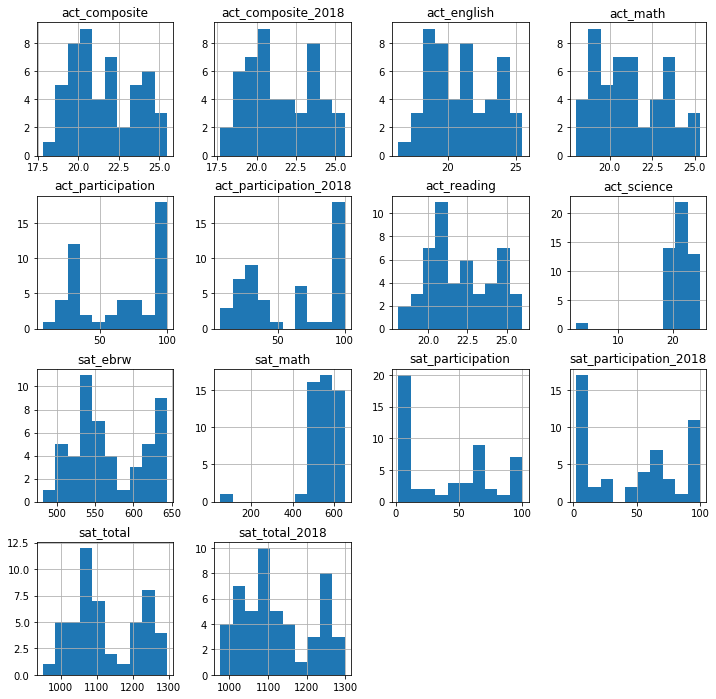

In [110]:
final_df1.hist( figsize= (12,12));

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

The data of means are not normally distributed in this dataset.The distributions for math is heavily skewd to the right in case of SAT data and not normally distributed in case of ACT data. In case of Reading, the data does tend towards a normal distribution but is not.

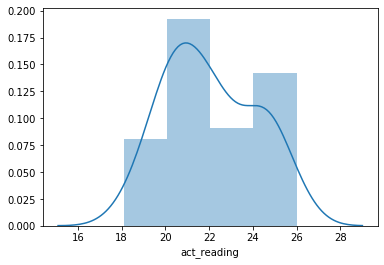

In [124]:
sns.distplot(final_df1['act_reading'])

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

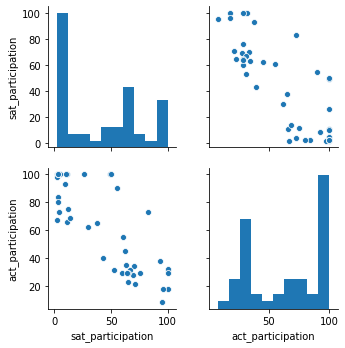

In [132]:
sns.pairplot(data = final_df1, vars = ['sat_participation','act_participation'])

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

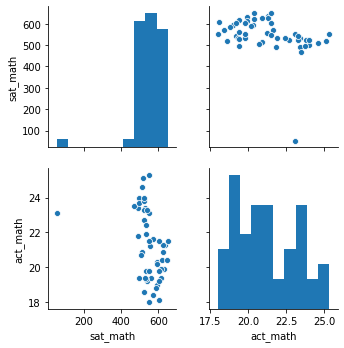

In [139]:
sns.pairplot(data = final_df1, vars = ['sat_math','act_math'])

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [134]:
from scipy import stats
tt = stats.ttest_ind(final_df['sat_math'], final_df1['act_math'], equal_var = False)

In [136]:
p_value = tt.statistic
t_stat = tt.statistic

if p_value < 0.05:
    print("Statistically significat")
else:
    print(p_value)

44.261389999584416


Because our $p$-value is above 0.05, we fail to reject the null hypothesis. We do not have enouhgh evidence to conclude that mean score differs between SAT Math scores and ACT math scores.

## FOCUS ON HAWAII

In [144]:
Hawaii = final_df1[final_df1['state']== 'Hawaii']
Hawaii

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_ebrw,sat_math,sat_total,act_participation_2018,act_composite_2018,sat_participation_2018,sat_total_2018
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544.0,541.0,1085.0,89,18.9,56,1099


In [221]:
#For ACT scores
national_mean = final_df1[['act_english', 'act_math', 'act_reading', 'act_science', 'act_composite']].mean()
hawaii_act = Hawaii[['act_english', 'act_math', 'act_reading', 'act_science', 'act_composite']].mean()

In [222]:
df = pd.DataFrame(columns = ['national_mean', 'hawaii_act'], index = [national_mean.index])
df['national_mean'] = national_mean.values
df['hawaii_act'] = hawaii_act.values
df

,national_mean,hawaii_act
act_english,20.980,17.8
act_math,21.230,19.2
act_reading,22.052,19.2
act_science,21.070,19.3
act_composite,21.562,19.0


Text(0.5, 1.0, 'Hawaii ACT Scores Vs National Average')

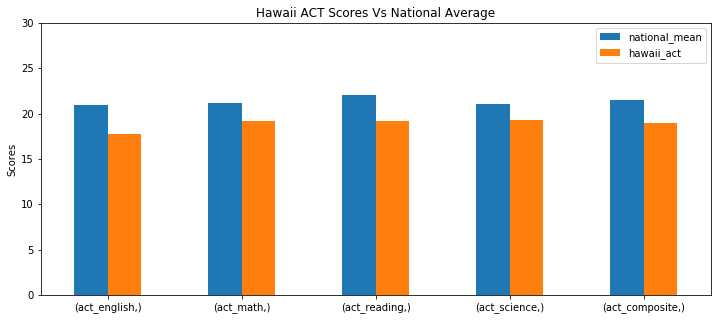

In [245]:
df.plot(kind = 'bar', figsize=(12,5), ylim=(0,30))
plt.ylabel('Scores')
plt.xticks(rotation = 0);
plt.title('Hawaii ACT Scores Vs National Average')

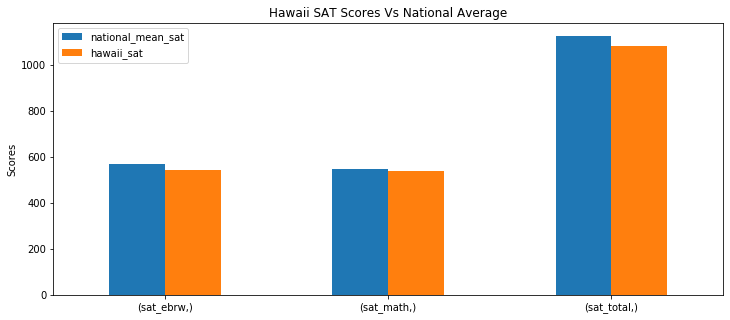

In [244]:
#For SAT
national_mean_sat = final_df1[['sat_ebrw','sat_math', 'sat_total']].mean()
hawaii_sat = Hawaii[['sat_ebrw','sat_math', 'sat_total']].mean()

df1 = pd.DataFrame(columns = ['national_mean_sat', 'hawaii_sat'], index = [national_mean_sat.index])
df1['national_mean_sat'] = national_mean_sat.values
df1['hawaii_sat'] = hawaii_sat.values
df1.plot(kind = 'bar', figsize=(12,5))
plt.ylabel('Scores')
plt.xticks(rotation = 0);
plt.title('Hawaii SAT Scores Vs National Average');

In [262]:
df_part

,national_mean_part,hawaii_part
sat_participation,40.46,55.0
act_participation,64.56,90.0
sat_participation_2018,47.40,56.0
act_participation_2018,60.92,89.0


In [242]:
df1

,national_mean_sat,hawaii_sat
sat_ebrw,569.90,544.0
sat_math,548.24,541.0
sat_total,1127.68,1085.0


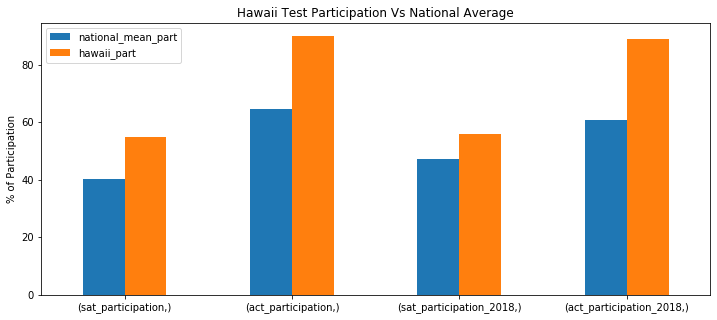

In [247]:
#Participation
national_mean_part = final_df1[['sat_participation',
                                'act_participation', 
                                'sat_participation_2018', 
                                'act_participation_2018']].mean()

hawaii_part = Hawaii[['sat_participation',
                      'act_participation',
                      'sat_participation_2018',
                      'act_participation_2018']].mean()


df_part = pd.DataFrame(columns = ['national_mean_part', 'hawaii_part'], index = [national_mean_part.index])
df_part['national_mean_part'] = national_mean_part.values
df_part['hawaii_part'] = hawaii_part.values
df_part.plot(kind = 'bar', figsize=(12,5))
plt.ylabel('% of Participation')
plt.xticks(rotation = 0);
plt.title('Hawaii Test Participation Vs National Average');

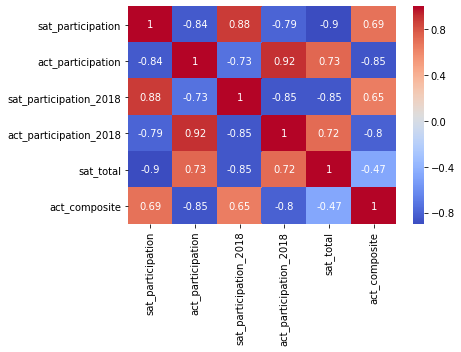

In [259]:
sns.heatmap(final_df1[['sat_participation',
           'act_participation', 
           'sat_participation_2018', 
           'act_participation_2018',
          'sat_total',
          'act_composite']].corr(), cmap ='coolwarm', annot = True);

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).


Just 1 in 10 Hawaii public school students in the Class of 2016 earned ACT scores considered ready for college-level coursework 
Public schools started making the ACT mandatory for all Hawaii public school juniors in 2014.
Due to lowest performance across IQ stats, SAT, ACT, and % of college graduates, Hawaii was called the least intelligent state in 2015


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Student adversity is an important factor to be researched
SAT will be adding an adversity factor for forthcoming tests to account for the students socio-economic backgrounds (Source: nytimes  ) 
Making a test mandatory and increasing participation is not the best approach to achieve performance
Participation and performance are inversely proportional
States like Minnesota should be candidates for further research as it has a very low participation rate and yet high scores on the SAT.
